**Getting started with USPS dataset**

---

[Handwitten Digits USPS dataset](http://ieeexplore.ieee.org/document/291440/) has has 7291 train and 2007 test images. The images are 16*16 grayscale pixels.

The dataset is given in [hdf5 file format](https://support.hdfgroup.org/HDF5/), the hdf5 file has two groups train and test and each group has two datasets: data and target.

---


Demonstration of how to load USPS dataset, visualize and build a linear SVM classifier on it and predict accuracy.



**Download, Extract Dataset from .zip and place with Python Notebook together**

In [ ]:
import numpy as np #linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

Populating the interactive namespace from numpy and matplotlib

**Upload the dataset to Google collaboratory**

In [ ]:
from google.colab import files
upload = files.upload()

Saving usps.h5 to usps.h5


**Initially test if  dataset is uploaded in folder named "content" else adjust folder path accordinly everywhere**

In [ ]:
print("Data Successfully uploaded!\n")
import os
print(os.listdir("../content/"))

Data Successfully uploaded!

['.config', 'usps.h5', '.ipynb_checkpoints', 'sample_data']


**Function to read USPS data**

In [ ]:
import h5py
from functools import reduce
def hdf5(path, data_key="data",target_key="target", flatten=True ):
  """
      loads data from hdf5: 
      - hdf5 should have 'train' and 'test' groups 
      - each group should have 'data' and 'target' dataset or spcify the key
      - flatten means to flatten images N * (C * H * W) as N * D array
  """
  with h5py.File(path,'r') as hf:
    train = hf.get('train')
    X_tr = train.get(data_key)[:]
    y_tr = train.get(target_key)[:]
    test = hf.get('test')
    X_te = test.get(data_key)[:]
    y_te = test.get(target_key)[:]
    if flatten:
      X_tr = X_tr.reshape(X_tr.shape[0], reduce(lambda a, b: a * b, X_tr.shape[1:]))
      X_te = X_te.reshape(X_te.shape[0], reduce(lambda a, b: a * b, X_te.shape[1:]))
  return X_tr, y_tr, X_te, y_te
  


In [ ]:
X_tr, y_tr, X_te, y_te = hdf5("../content/usps.h5")
X_tr.shape, X_te.shape


((7291, 256), (2007, 256))

**Data Visualization**

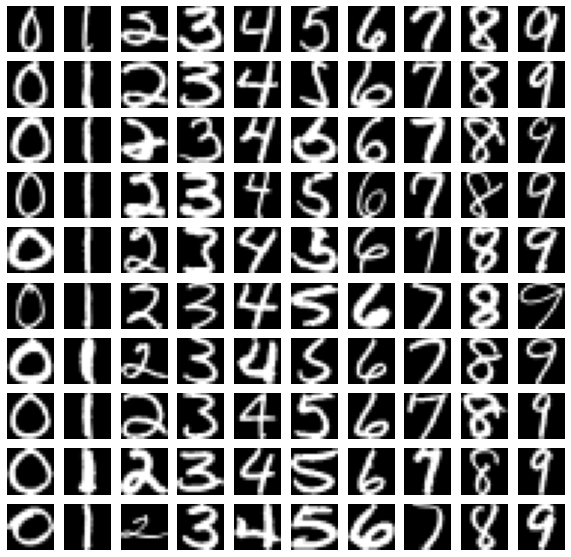

In [ ]:
import matplotlib.pyplot as plt
num_samples = 10
num_classes = len(set(y_tr))
# or
classes = set(y_tr)
num_classes = len(classes)

fig, ax = plt.subplots(num_samples, num_classes, sharex = True, sharey = True, figsize=(num_classes, num_samples))

for label in range(num_classes):
    class_idxs = np.where(y_tr == label)
  
    for i, idx in enumerate(np.random.randint(0, class_idxs[0].shape[0], num_samples)):
        ax[i, label].imshow(X_tr[class_idxs[0][idx]].reshape([16, 16]), 'gray')
        ax[i, label].set_axis_off()

**Building a classifier**

---


Demonstrating training of Support Vector Machine Classifer and computing the accuracy of trained model.

In [ ]:
from sklearn.svm import LinearSVC
lsvm = LinearSVC(C = 0.1)
lsvm.fit(X_tr, y_tr)

LinearSVC(C=0.1)

In [ ]:
preds = lsvm.predict(X_te)
accuracy = sum(preds == y_te)/len(y_te)
print("Accuracy of Support Vector Machine is", accuracy,"or",round(accuracy*100,2),"%")

Accuracy of Support Vector Machine is 0.916791230692576 or 91.68 %
